In [1]:
import pandas as pd 

In [3]:
#Load tm score computed for beta-CA against 3000, delete other columns as only ID and TM is required 
df_1 = pd.read_csv('TM_align_1ca2_final_tm2_23_11_22.csv')
#df_1 = df[['ID', 'TM']]
df_1

,ID,TM
0,4.2.1.1_0_67,0.25850
1,4.2.1.1_100_29,0.23981
2,4.2.1.1_100_38,0.22918
3,4.2.1.1_100_40,0.23442
4,4.2.1.1_100_50,0.95464
...,...,...
2995,4.2.1.1_99_47,0.22718
2996,4.2.1.1_99_49,0.24812
2997,4.2.1.1_99_74,0.26819
2998,4.2.1.1_99_81,0.24362


In [4]:
#Read in 3000 sequences with perplexity and plddt
df_2 = pd.read_csv('3000_perplexity_plddt.csv')
df_2

,ID,Perplexity,pLDDT
0,4.2.1.1_162_5,1.0300825514372156.pdb,89.537468
1,4.2.1.1_579_96,1.0268235988524594.pdb,89.725428
2,4.2.1.1_294_4,1.0249868772328228.pdb,94.871653
3,4.2.1.1_417_12,1.0278664190552391.pdb,90.747282
4,4.2.1.1_377_88,1.0338043958086365.pdb,93.251728
...,...,...,...
2995,4.2.1.1_315_33,1.0242980870593736.pdb,88.886724
2996,4.2.1.1_555_5,1.0319587414419145.pdb,93.004406
2997,4.2.1.1_319_12,1.032417416144532.pdb,92.853629
2998,4.2.1.1_209_33,1.0280286823498297.pdb,90.924432


In [5]:
df_combined = pd.read_csv('combined_interpro_protinfer_tm.csv')
df_combined

,ID,Perplexity,pLDDT,TM
0,4.2.1.1_100_29,1.033762,89.874202,0.21207
1,4.2.1.1_100_40,1.028002,89.776538,0.21130
2,4.2.1.1_100_51,1.031376,87.811590,0.22459
3,4.2.1.1_101_15,1.019743,91.012001,0.21607
4,4.2.1.1_101_47,1.017224,93.586299,0.22601
...,...,...,...,...
1237,4.2.1.1_9_0,1.033743,89.114001,0.22069
1238,4.2.1.1_9_2,1.031661,90.468219,0.21908
1239,4.2.1.1_9_28,1.020770,88.618814,0.23705
1240,4.2.1.1_9_36,1.021628,91.491166,0.21580


In [6]:
#Delete the TM as this was the old TM score 
del df_combined['TM']
df_combined

,ID,Perplexity,pLDDT
0,4.2.1.1_100_29,1.033762,89.874202
1,4.2.1.1_100_40,1.028002,89.776538
2,4.2.1.1_100_51,1.031376,87.811590
3,4.2.1.1_101_15,1.019743,91.012001
4,4.2.1.1_101_47,1.017224,93.586299
...,...,...,...
1237,4.2.1.1_9_0,1.033743,89.114001
1238,4.2.1.1_9_2,1.031661,90.468219
1239,4.2.1.1_9_28,1.020770,88.618814
1240,4.2.1.1_9_36,1.021628,91.491166


In [7]:
#New TM Values added
df_combined_final = pd.merge(df_1, df_combined, on="ID")
df_combined_final

,ID,TM,Perplexity,pLDDT
0,4.2.1.1_100_29,0.23981,1.033762,89.874202
1,4.2.1.1_100_40,0.23442,1.028002,89.776538
2,4.2.1.1_100_51,0.24918,1.031376,87.811590
3,4.2.1.1_101_15,0.23764,1.019743,91.012001
4,4.2.1.1_101_47,0.25005,1.017224,93.586299
...,...,...,...,...
1237,4.2.1.1_99_15,0.24104,1.033092,90.933190
1238,4.2.1.1_99_47,0.22718,1.036281,93.205774
1239,4.2.1.1_99_49,0.24812,1.034111,93.743778
1240,4.2.1.1_99_81,0.24362,1.036331,91.618872


In [8]:
#Sequences incorrectly predicted 
df_diff = df_2[~df_2.index.isin(df_combined_final.index)]

In [9]:
df_diff

,ID,Perplexity,pLDDT
1242,4.2.1.1_190_21,1.0303086771377852.pdb,93.263722
1243,4.2.1.1_631_46,1.0298659765368812.pdb,90.665184
1244,4.2.1.1_259_35,1.0336205124870985.pdb,90.861128
1245,4.2.1.1_524_17,1.0297374620583362.pdb,91.257435
1246,4.2.1.1_25_81,1.0268144202877119.pdb,90.178656
...,...,...,...
2995,4.2.1.1_315_33,1.0242980870593736.pdb,88.886724
2996,4.2.1.1_555_5,1.0319587414419145.pdb,93.004406
2997,4.2.1.1_319_12,1.032417416144532.pdb,92.853629
2998,4.2.1.1_209_33,1.0280286823498297.pdb,90.924432


In [10]:
#New TM Values added
df_diff_final = pd.merge(df_1, df_diff, on="ID")

In [11]:
#Selected sequences based on the thresholds below
df_selected_final = df_combined_final.loc[(df_combined_final['pLDDT'] >= 86) & (df_combined_final['TM'] >= 0.9)]

In [12]:
#From the sequences that had both an interproscan and protinfer prediction removed the selected sequences so we can visualise in a different colour 
df_combined_filtered_final = df_combined_final[~df_combined_final.index.isin(df_selected_final.index)]

In [13]:
df_combined_filtered_final

,ID,TM,Perplexity,pLDDT
0,4.2.1.1_100_29,0.23981,1.033762,89.874202
1,4.2.1.1_100_40,0.23442,1.028002,89.776538
2,4.2.1.1_100_51,0.24918,1.031376,87.811590
3,4.2.1.1_101_15,0.23764,1.019743,91.012001
4,4.2.1.1_101_47,0.25005,1.017224,93.586299
...,...,...,...,...
1237,4.2.1.1_99_15,0.24104,1.033092,90.933190
1238,4.2.1.1_99_47,0.22718,1.036281,93.205774
1239,4.2.1.1_99_49,0.24812,1.034111,93.743778
1240,4.2.1.1_99_81,0.24362,1.036331,91.618872


In [14]:
#Sanity check and count of sequences 
df_combined_filtered_final_len = len(df_combined_filtered_final)
df_diff_final_len = len(df_diff_final)
df_selected_final_len = len(df_selected_final)
total = df_combined_filtered_final_len + df_diff_final_len + df_selected_final_len 
print(total)

3000


In [15]:
concatenated = pd.concat([df_diff_final.assign(Set='Total'),df_combined_filtered_final.assign(Set='Predicted Correctly'),df_selected_final.assign(Set='Selected')])

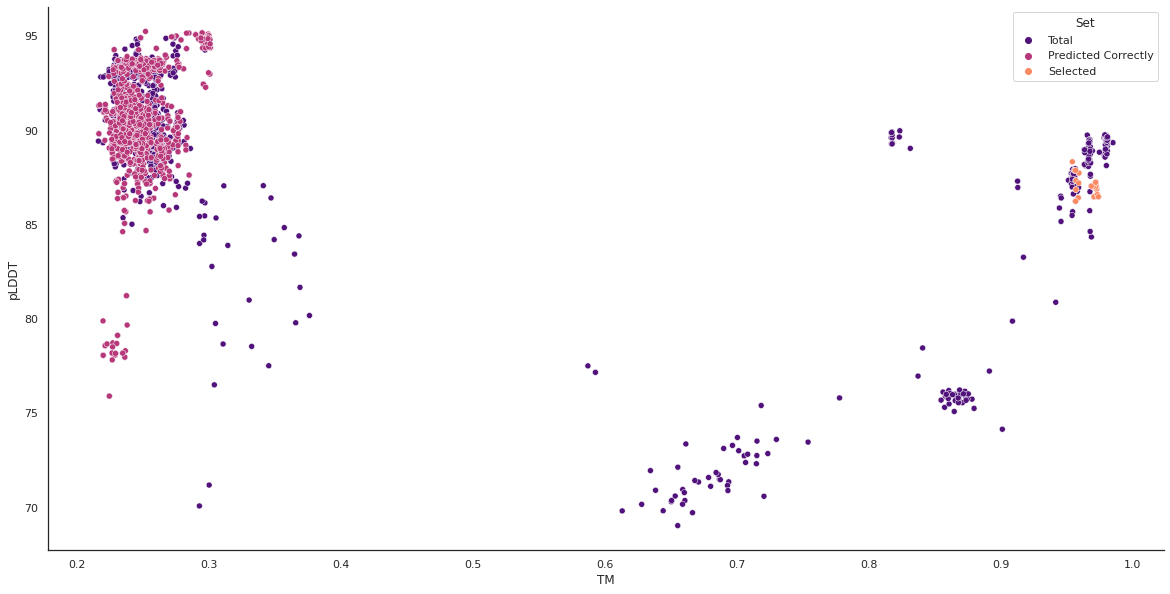

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
fig, ax = plt.subplots()
ax = sns.scatterplot(x='TM', y='pLDDT', data=concatenated, hue ='Set', palette="magma")
for patch in ax.artists:
     r, g, b, a = patch.get_facecolor()
     patch.set_facecolor((r, g, b, .3))
sns.despine();
plt.show()